[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/randiijulian/Machine-Learning-Terapan-Dicoding/blob/main/Predictive%20Analysis/Predictive_Analysis_Submission.ipynb)

Nama : Randi Julian Saputra

Github : github.com/randiijulian

Dataset : raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv

## Project Submission 1 Dicoding Machine Learning Terapan
Predictive Analysis

---



**Connect to drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Predictive Analysis"

/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Predictive Analysis


**Import needed library and module**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [4]:
!pip install pycaret #Install Pycaret For references using models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00

**Load Dataset**
Install kaggle and using kaggle API for import public dataset from kaggle

In [5]:
# !pip install -U -q kaggle # install kaggle for using kaggle
# !mkdir -p ~/.kaggle
# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # use API kaggle for import file from kaggle
# !kaggle datasets download -d thedevastator/jobs-dataset-from-glassdoor # download file from kaggle
# !ls

In [6]:
# !unzip \*.zip && rm *.zip

## Data Understanding

---



Deskripsi variabel pada dataset

In [7]:
import pandas as pd
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
home_data = pd.read_csv(url)
home_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
# home_data = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/salary_data_cleaned.csv")
# # home_data.drop(['Unnamed: 0', 'flight'], axis = 1, inplace = True)

In [9]:
home_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
home_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### pycaret setup models

In [12]:
from pycaret.regression import * #Setup Models
setup = setup(home_data, target = 'price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(53940, 10)"
4,Transformed data shape,"(53940, 27)"
5,Transformed train set shape,"(37758, 27)"
6,Transformed test set shape,"(16182, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


In [13]:
best = compare_models() #Run models for references

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,274.4331,306902.7069,553.5162,0.9807,0.0948,0.0681,18.3610
lightgbm,Light Gradient Boosting Machine,292.1413,307583.2020,554.1180,0.9807,0.1112,0.0855,0.6090
rf,Random Forest Regressor,277.4036,314158.8815,560.0267,0.9802,0.0942,0.0675,20.3120
xgboost,Extreme Gradient Boosting,290.7292,317009.9616,562.6215,0.9801,0.1014,0.0759,6.5400
gbr,Gradient Boosting Regressor,407.2008,550535.7418,741.5877,0.9654,0.2054,0.1290,4.6800
dt,Decision Tree Regressor,369.8229,580533.2583,761.2944,0.9635,0.1275,0.0878,0.5640
knn,K Neighbors Regressor,529.6507,997785.1408,998.0938,0.9372,0.1922,0.1479,1.2790
lasso,Lasso Regression,740.2553,1275754.0335,1129.0970,0.9196,0.5808,0.3878,1.4390
llar,Lasso Least Angle Regression,740.2038,1275775.1633,1129.1070,0.9196,0.5808,0.3878,0.3250
br,Bayesian Ridge,742.4270,1299254.9876,1139.1459,0.9182,0.5792,0.3920,0.5560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Melihat seluruh algoritma regresi yang ada dan melakukan perbandingan algoritma yang menghasilkan performa yang bagus berdasarkan kesesuaian dengan data yang digunakan. Berdasarkan hasil dari perbandingan model tersebut, maka proyek ini akan menggunakan algoritma Extra Trees Regressor serta menggunakan Lasso Regression dan beberapa algoritma lainnya.

## Data Preparation

---



### Exploratory Data Analysis

#### Exploratory Data Analysis - Data Cleansing

melakukan pengecekan missing value pada data

In [14]:
for col in home_data.columns: #Hitung missing value setiap kolom
  print("Kolom : {} memiliki nilai NaN sebanyak {} dari {} row".format(col,
                         str(home_data[col].isna().sum()),
                         str(len(home_data.index))))

Kolom : carat memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : cut memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : color memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : clarity memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : depth memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : table memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : price memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : x memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : y memiliki nilai NaN sebanyak 0 dari 53940 row
Kolom : z memiliki nilai NaN sebanyak 0 dari 53940 row


melakukan pengecekan value bernilai 0 pada data

In [15]:
for col in home_data.columns: #Cek yang bernilai 0
  print("Kolom : {} memiliki nilai 0 sebanyak {} dari {} row".format(col,
                         str((home_data[col]==0).sum()),
                         str(len(home_data.index))))

Kolom : carat memiliki nilai 0 sebanyak 0 dari 53940 row
Kolom : cut memiliki nilai 0 sebanyak 0 dari 53940 row
Kolom : color memiliki nilai 0 sebanyak 0 dari 53940 row
Kolom : clarity memiliki nilai 0 sebanyak 0 dari 53940 row
Kolom : depth memiliki nilai 0 sebanyak 0 dari 53940 row
Kolom : table memiliki nilai 0 sebanyak 0 dari 53940 row
Kolom : price memiliki nilai 0 sebanyak 0 dari 53940 row
Kolom : x memiliki nilai 0 sebanyak 8 dari 53940 row
Kolom : y memiliki nilai 0 sebanyak 7 dari 53940 row
Kolom : z memiliki nilai 0 sebanyak 20 dari 53940 row


In [16]:
home_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
home_data.loc[(home_data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


drop nilai 0 yang terdapat pada kolom x, y, z dan melakukan pengecekan ukuran data untuk memastikan baris sudah di drop

In [18]:
home_data = home_data.loc[(home_data[['x','y','z']]!=0).all(axis=1)]
home_data.shape

(53920, 10)

#### Exploratory Data Analysis - Univariate Analysis

Melakukan data cleansing terhadap outliers yang terdapat pada data

In [19]:
Q1 = home_data.quantile(0.25)
Q3 = home_data.quantile(0.75)
IQR=Q3-Q1
home_data=home_data[~((home_data<(Q1-1.5*IQR))|(home_data>(Q3+1.5*IQR))).any(axis=1)]

In [20]:
# Cek ukuran dataset setelah kita drop outliers
home_data.shape

(47524, 10)

Membagi variabel menjadi numerical features dan categorical features

In [21]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [22]:
import matplotlib.pyplot as plot

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


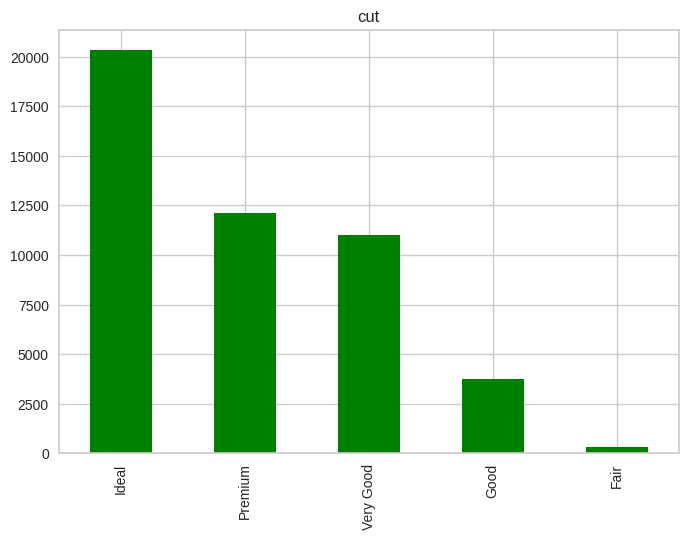

In [23]:
feature = categorical_features[0]
count = home_data[feature].value_counts()
percent = 100*home_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, color="green");

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


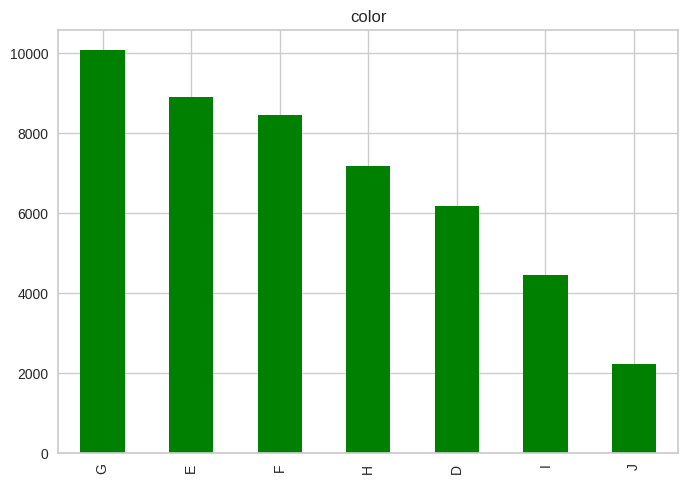

In [24]:
feature = categorical_features[1]
count = home_data[feature].value_counts()
percent = 100*home_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, color="green");

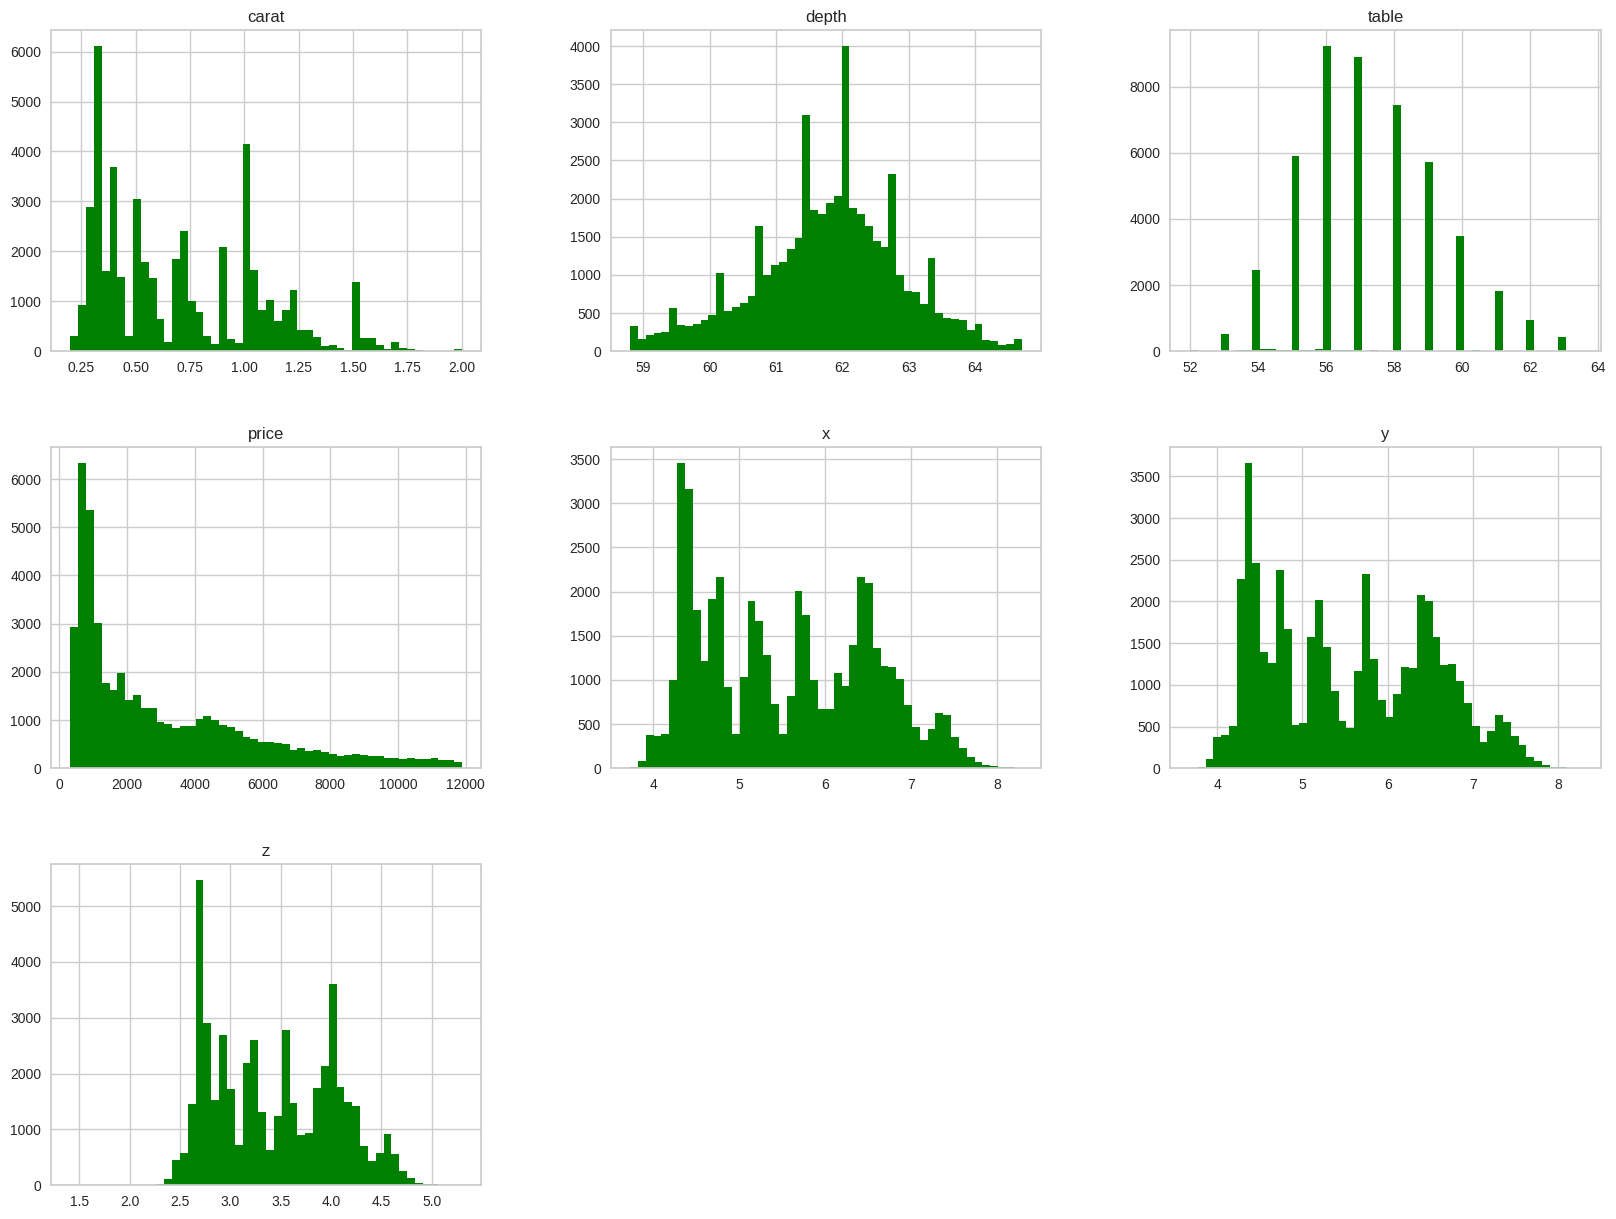

In [25]:
home_data.hist(bins=50, figsize=(20,15), color="green")
plot.show()

#### Explotaroty Data Analysis - Multivariate Analysis

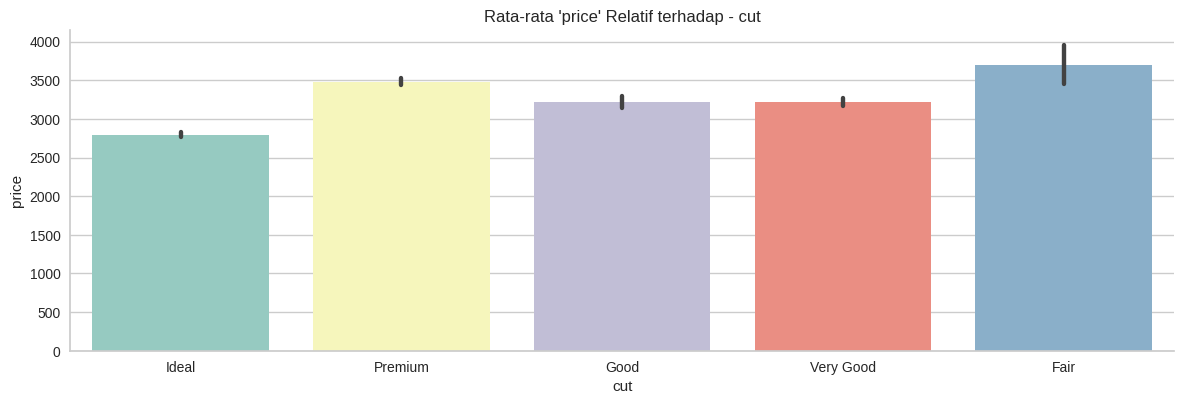

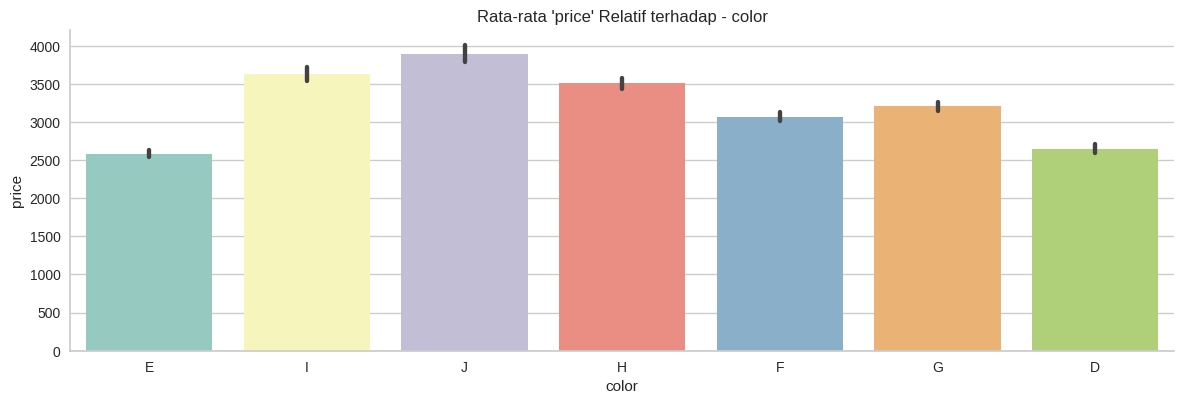

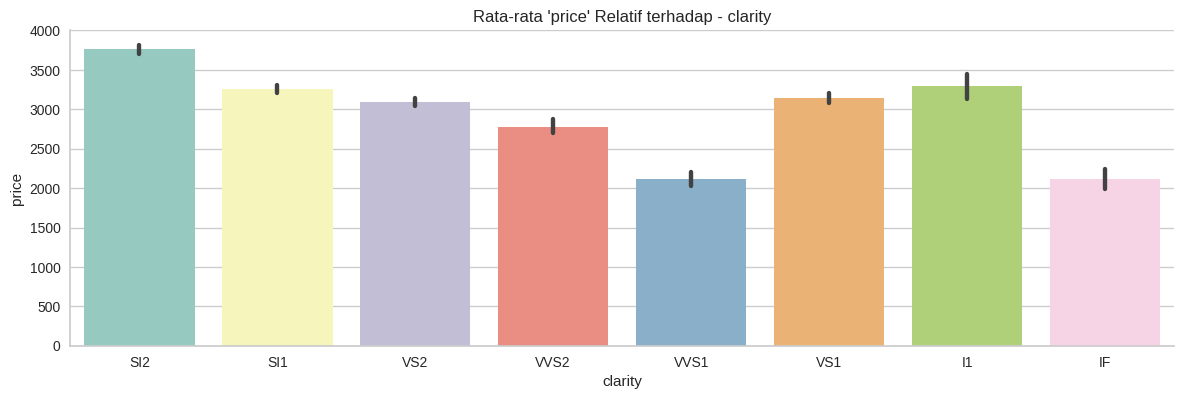

In [26]:
cat_features = home_data.select_dtypes(include='object').columns.to_list()
import seaborn as sns
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=home_data, palette="Set3")
  plot.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

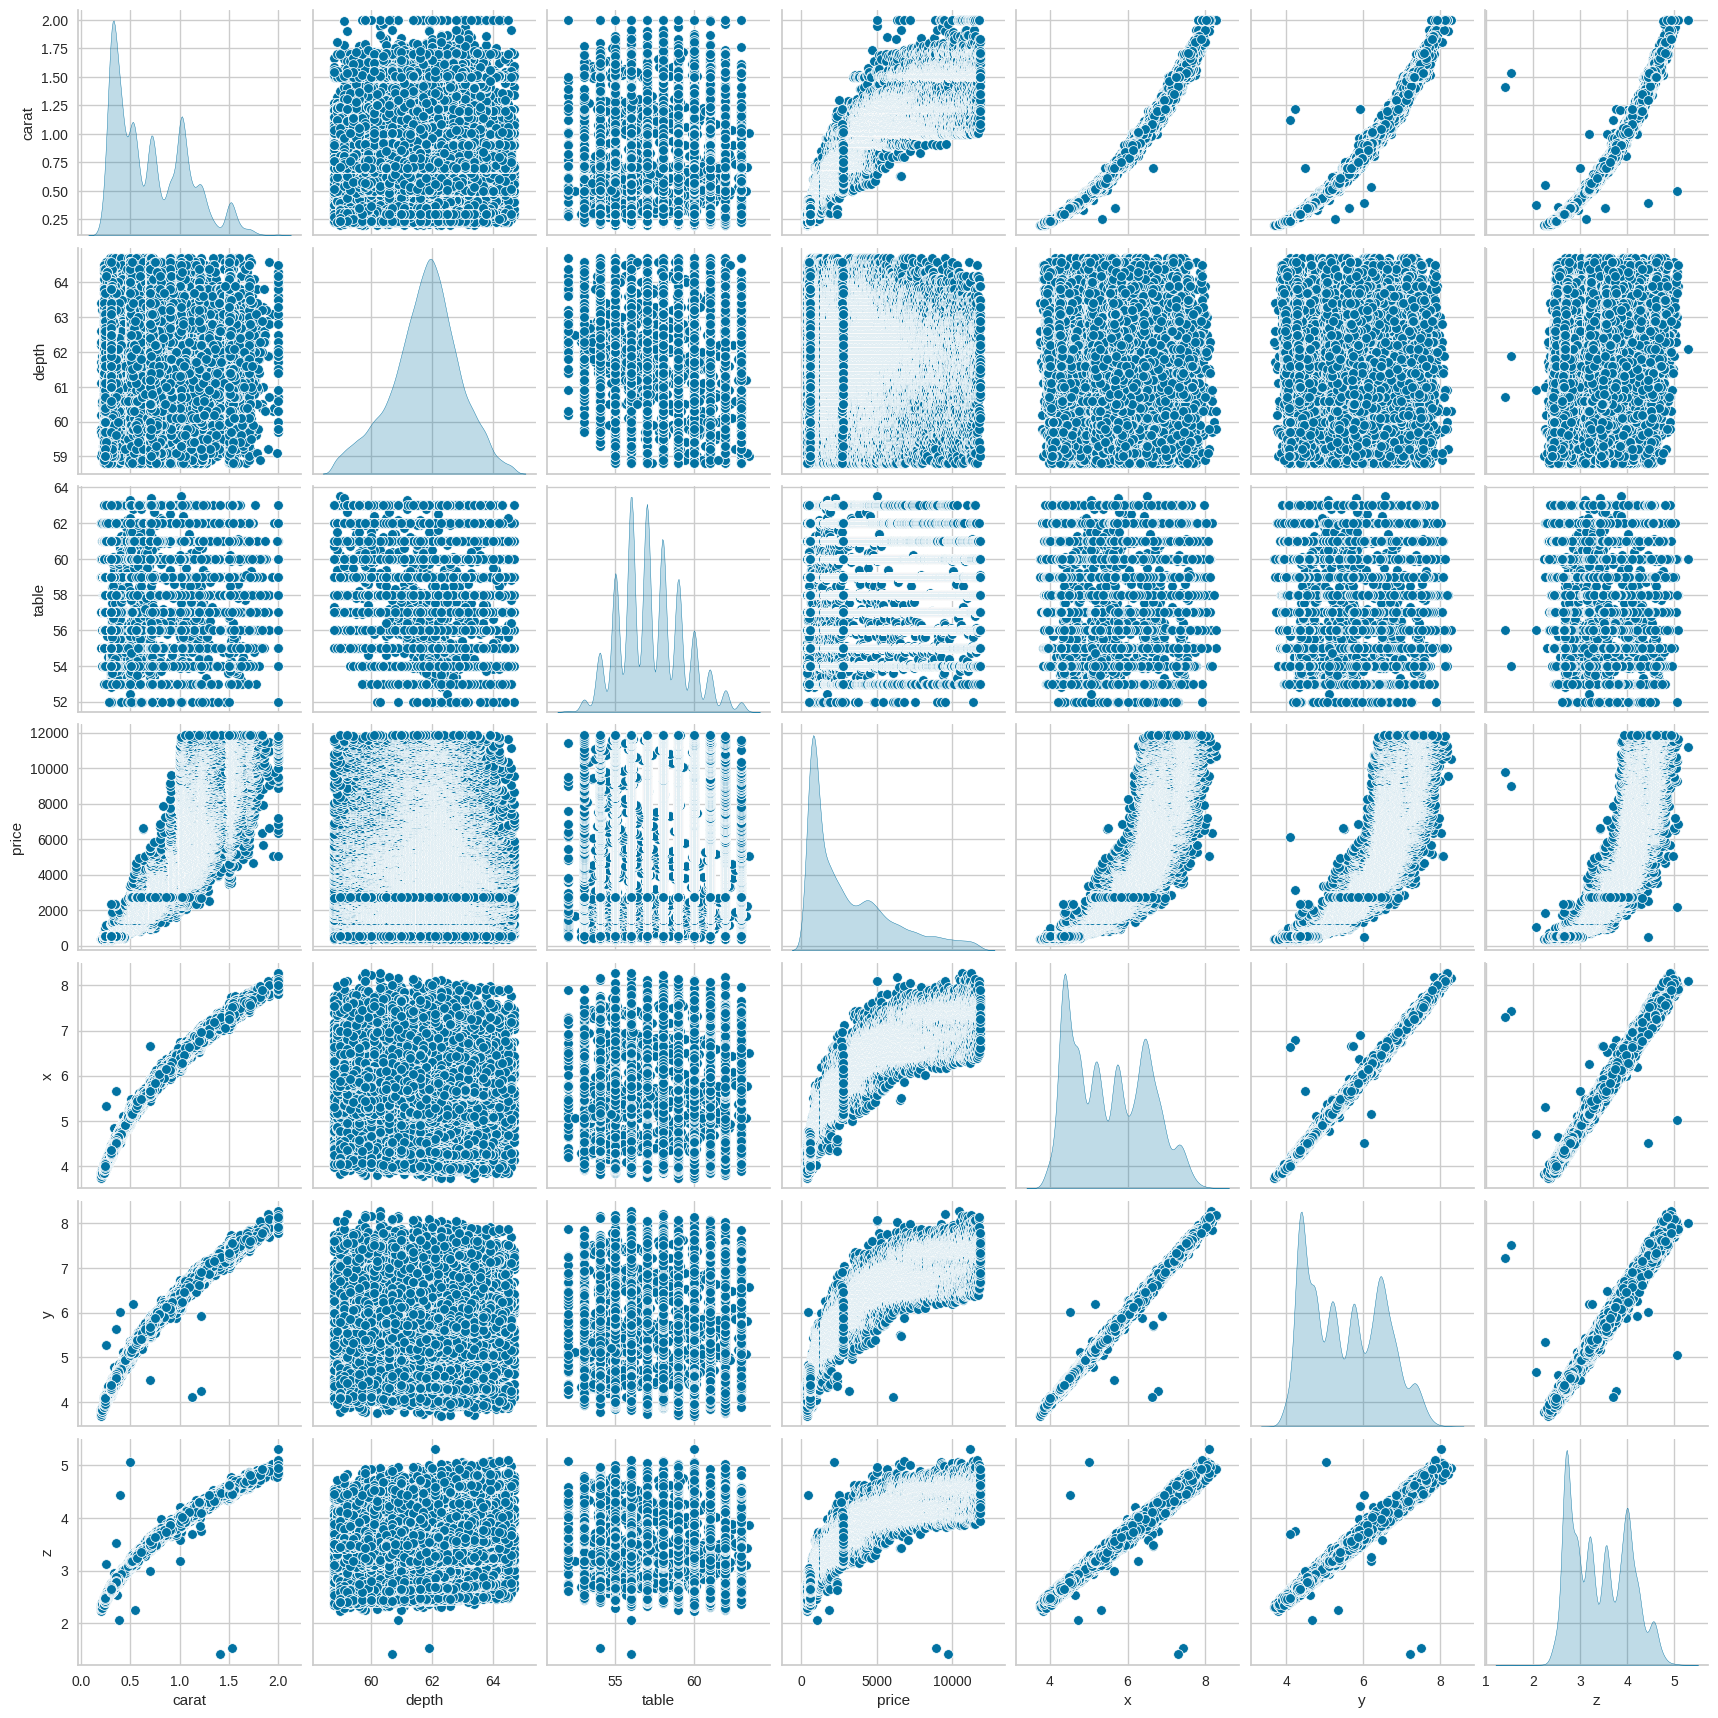

In [27]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(home_data, diag_kind = 'kde')

Melakukan visualisasi correlation matrix untuk melihat tingkat keterkaitan antar variabel

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

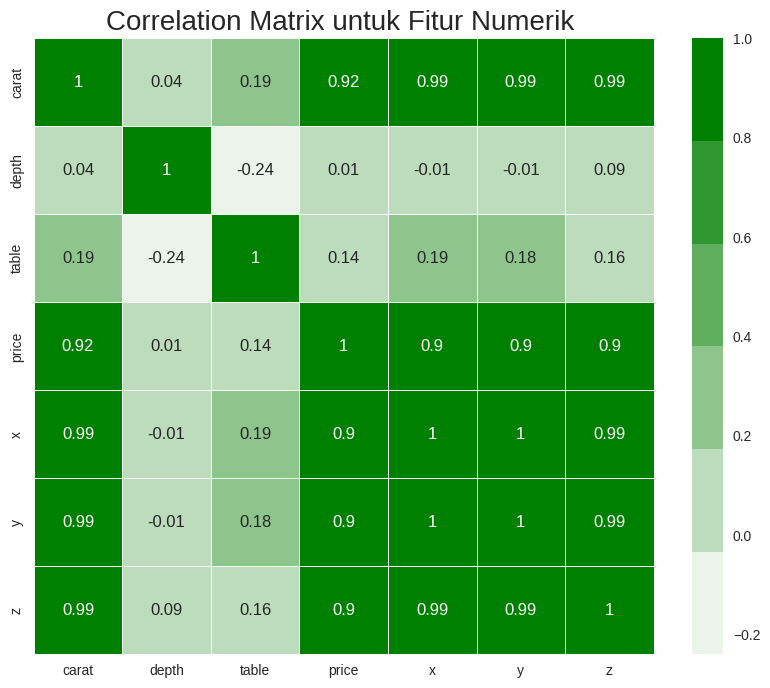

In [28]:
plot.figure(figsize=(10, 8))
correlation_matrix = home_data.corr().round(2)
# annot = True to print the values inside the square
color = sns.light_palette("green")
sns.heatmap(data=correlation_matrix, annot=True, cmap=color, linewidths=0.5, )
plot.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [29]:
home_data.drop(['depth'], inplace=True, axis=1)
home_data.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


### One Hot Encoder

In [30]:
from sklearn.preprocessing import OneHotEncoder
home_data = pd.concat([home_data, pd.get_dummies(home_data['cut'], prefix='cut', drop_first=True)],axis=1)
home_data = pd.concat([home_data, pd.get_dummies(home_data['color'], prefix='color', drop_first=True)],axis=1)
home_data = pd.concat([home_data, pd.get_dummies(home_data['clarity'], prefix='clarity', drop_first=True)],axis=1)
home_data.drop(['cut','color','clarity'], axis=1, inplace=True)
home_data.head()

,carat,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### Splitting Dataset
Melakukan split data sebelum dilakukannya modeling

In [31]:
from sklearn.model_selection import train_test_split

X = home_data.drop(["price"],axis =1)
y = home_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(X_train[['x','y','z']])
princ_comp = pca.transform(X_train[['x','y','z']])

In [33]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

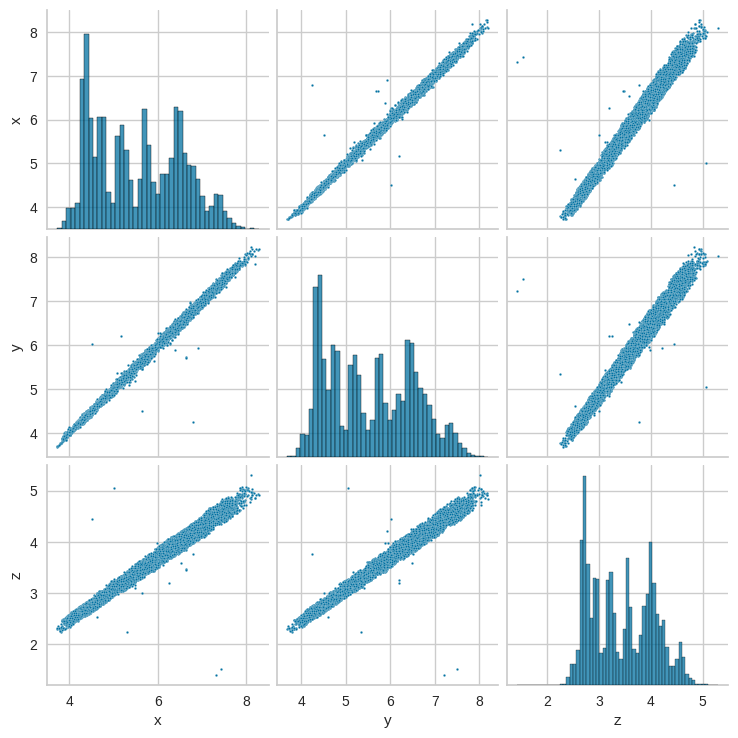

In [34]:
sns.pairplot(X_train[['x','y','z']], plot_kws={"s": 3});

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X_train[['x','y','z']])
X_train['dimension_index'] = pca.transform(X_train.loc[:, ('x','y','z')]).flatten()
X_train.drop(['x','y','z'], axis=1, inplace=True)
X_train.head()

,carat,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension_index
52420,0.78,63.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0.600509
44667,0.32,55.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,-1.746122
41205,0.53,54.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-0.548119
4580,0.93,53.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1.090399
35241,0.37,62.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-1.370587


In [36]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=1, random_state=123)
# pca.fit(X_test[['x','y','z']])
X_test['dimension_index'] = pca.transform(X_test.loc[:, ('x','y','z')]).flatten()
X_test.drop(['x','y','z'], axis=1, inplace=True)
X_test.head()

,carat,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension_index
51619,0.72,58.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.290861
23536,1.51,59.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2.712448
10413,1.01,56.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1.385200
3157,0.78,58.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0.557135
1566,0.72,56.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.394869


In [37]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension_index']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()
X_test.loc[:, numerical_features]= scaler.transform(X_test[numerical_features])


In [38]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension_index
count,42771.0000,42771.0000,42771.0000
mean,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3738,-2.6021,-1.8868
25%,-0.8889,-0.6227,-0.9284
50%,-0.2694,-0.1279,-0.1061
75%,0.8079,0.8618,0.8842
max,3.4745,3.0887,2.6982


## Modeling

---


Melakukan modeling dengan membandingkan beberapa algoritma yang digunakan

#### Extra Trees Regressor
Melakukan modeling menggunakan algoritma Extra Trees Rergressor

In [39]:
#Import Necessary Library
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

ETree_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
ETree_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = ETree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Extra Trees:", mse)

Mean Squared Error Extra Trees: 149967.81606690513


#### Lasso Regression
Melakukan modeling menggunakan algoritma Lasso Regression

In [40]:
#Import Necessary Library
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize the Lasso regression model
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Lasso:", mse)

Mean Squared Error Lasso: 555515.2675789861


#### Lasso Least Angle Regression
Melakukan modeling menggunakan algoritma Lasso Least Angle Regression

In [41]:
#Import Necessary Library
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error

# Initialize the LassoLars regression model
lasso_lars = LassoLars(alpha=0.1)

# Fit the model to the training data
lasso_lars.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso_lars.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Lasso Least Angle:", mse)

Mean Squared Error Lasso Least Angle: 555515.685539876


#### Elastic Net
Melakukan modeling menggunakan algoritma Elastic Net

In [42]:
#Import Necessary Library
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Initialize the Elastic Net regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Predict on the test data
y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Elastic Net:", mse)

Mean Squared Error Elastic Net: 831403.9903822523


#### Lasso Net

In [43]:
# !pip install pycox

In [44]:
# !pip install lassonet

In [ ]:
# #Import Necessary Library
# from lassonet import LassoNetCoxRegressorCV
# from sklearn.metrics import mean_squared_error

# # Initialize the Lasso Net regression model
# lasso_net = LassoNetCoxRegressorCV(cv=5, random_state=42)

# # Fit the model to the training data
# lasso_net.fit(X_train, y_train)

# # Predict on the test data
# y_pred = lasso_net.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

#### Network Lasso

In [ ]:
# !python2 -m pip install network_lasso

In [ ]:
# import networkx as nx
# import numpy as np
# from network_lasso import NetworkLasso

# # Create a random graph
# G = nx.erdos_renyi_graph(20, 0.2, seed=42)

# # Generate random node features
# X = np.random.rand(G.number_of_nodes(), 5)

# # Generate random target values
# y = np.random.rand(G.number_of_nodes())

# # Create the adjacency matrix
# adj_matrix = nx.to_numpy_array(G)

# # Initialize Network Lasso regression model
# netlasso = NetworkLasso(alpha=0.1, gamma=0.5)

# # Fit the model to the data
# netlasso.fit(X, y, adj_matrix)

# # Predict on new data
# y_pred = netlasso.predict(X, adj_matrix)

# # Print the predicted values
# print("Predicted values:", y_pred)

#### Saving Model
Menyimpan semua model yang telah dilatih

In [45]:
import joblib

In [46]:
joblib.dump(ETree_regressor, "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Predictive Analysis/Model/Model Extra Trees Regressor.joblib")
joblib.dump(lasso, "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Predictive Analysis/Model/Model Lasso Regression.joblib")
joblib.dump(lasso_lars, "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Predictive Analysis/Model/Model Lasso Least Angle Regression.joblib")
joblib.dump(elastic_net, "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Predictive Analysis/Model/Model Elastic Net.joblib")

["/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Predictive Analysis/Model/Model Elastic Net.joblib"]

## Evaluation

---

Melakukan evaluation terhadap beberapa model algoritma yang digunakan pada tahap modeling

In [47]:
mse = pd.DataFrame(columns=['train', 'test'], index=['Extra Trees Regressor','Lasso Regression','Lasso Least Angle Regression', 'Elastic Net'])
model_dict = {'Extra Trees Regressor': ETree_regressor, 'Lasso Regression': lasso, 'Lasso Least Angle Regression': lasso_lars, 'Elastic Net': elastic_net}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
Extra Trees Regressor,0.054081,149.967816
Lasso Regression,558.32874,555.515268
Lasso Least Angle Regression,558.328177,555.515686
Elastic Net,837.14892,831.40399


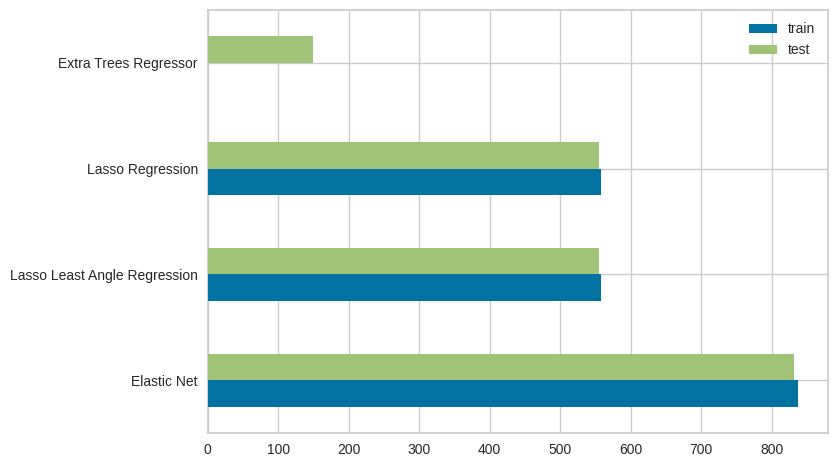

In [48]:
fig, ax = plot.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [49]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_Extra Trees Regressor,prediksi_Lasso Regression,prediksi_Lasso Least Angle Regression,prediksi_Elastic Net
51619,2396,2468.4,2842.2,2842.2,3277.8
23536,11540,11435.0,9589.9,9590.0,8452.0
10413,4779,5763.0,5577.1,5577.1,5551.6
3157,3334,3542.4,3852.8,3852.7,3999.0
1566,3005,2622.4,2754.5,2754.4,3399.7
52429,2513,2536.0,2896.5,2896.5,3189.5
41000,1183,1273.1,1608.3,1608.3,1326.2
11795,5088,5159.4,5992.1,5992.1,5813.8
32397,791,864.0,1298.6,1298.6,912.5
45947,1723,1814.0,2063.6,2063.6,1993.6


In [50]:
#Menghitung 10% Nilai Mean Squared Error (MSE)
mse.target = (home_data['price'].max() - home_data['price'].min()) * 10/100
print(mse.target)

1155.7
